# Fashion MNIST with Keras

## Overview

Fashion MNIST is an MNIST like dataset using images of clothing instead of hand-written digits. Each photo is 28x28 grayscale, with 10 different classes. The dataset contains 70000 images with 60000 for training and 10000 for testing.

## Download the dataset
download from Kaggle (https://www.kaggle.com/zalando-research/fashionmnist)

## Libraries Needed
We will be using Anaconda (python 3.6 or 3.5) and Keras with TensorFlow backend.

- <b>Anaconda</b> (https://www.youtube.com/watch?v=T8wK5loXkXg&t=9s)
- <b>TensorFlow</b> (https://www.youtube.com/watch?v=RplXYjxgZbw)
- <b>Keras</b> (```pip install keras```)

## Models

We'll be using models based on examples from Kaggle (https://www.kaggle.com/danialk/range-of-cnns-on-fashion-mnist-dataset)

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'svg'

In [8]:
# split the training and testing data into X (image) and Y (label) arrays

train_df = pd.read_csv(r'fashion-mnist_train.csv')
test_df = pd.read_csv(r'fashion-mnist_test.csv')

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

In [9]:
# reshape the data

im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

In [10]:
# our 3 models 

name = '1_Layer'
cnn_model_1 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout'),
    Flatten(name='flatten'),
    Dense(32, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name = '2_Layer'
cnn_model_2 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name='3_layer'
cnn_model_3 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', 
           input_shape=im_shape, kernel_initializer='he_normal', name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.25, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Conv2D(128, kernel_size=3, activation='relu', name='Conv2D-3'),
    Dropout(0.4, name='Dropout-3'),
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='Dense'),
    Dropout(0.4, name='Dropout'),
    Dense(10, activation='softmax', name='Output')
], name=name)

cnn_models = [cnn_model_1, cnn_model_2, cnn_model_3]

In [11]:
# the model summaries

for model in cnn_models:
    model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
Dense (Dense)                (None, 32)                173088    
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________
____

In [12]:
# train the models and save results to a dict

history_dict = {}

for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=50, verbose=1,
        validation_data=(x_validate, y_validate)
    )
    
    history_dict[model.name] = history

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 15s - loss: 0.8256 - acc: 0.7313 - val_loss: 0.4778 - val_acc: 0.8314
Epoch 2/50
48000/48000 [==============================] - 15s - loss: 0.4394 - acc: 0.8474 - val_loss: 0.4009 - val_acc: 0.8628
Epoch 3/50
48000/48000 [==============================] - 15s - loss: 0.3819 - acc: 0.8666 - val_loss: 0.3584 - val_acc: 0.8752
Epoch 4/50
48000/48000 [==============================] - 15s - loss: 0.3500 - acc: 0.8773 - val_loss: 0.3372 - val_acc: 0.8833
Epoch 5/50
48000/48000 [==============================] - 15s - loss: 0.3330 - acc: 0.8832 - val_loss: 0.3222 - val_acc: 0.8897
Epoch 6/50
48000/48000 [==============================] - 15s - loss: 0.3176 - acc: 0.8889 - val_loss: 0.3106 - val_acc: 0.8902
Epoch 7/50
48000/48000 [==============================] - 15s - loss: 0.3008 - acc: 0.8943 - val_loss: 0.3046 - val_acc: 0.8941
Epoch 8/50
48000/48000 [==============================

48000/48000 [==============================] - 35s - loss: 0.2166 - acc: 0.9214 - val_loss: 0.2254 - val_acc: 0.9179
Epoch 14/50
48000/48000 [==============================] - 35s - loss: 0.2126 - acc: 0.9224 - val_loss: 0.2182 - val_acc: 0.9198
Epoch 15/50
48000/48000 [==============================] - 35s - loss: 0.2070 - acc: 0.9240 - val_loss: 0.2261 - val_acc: 0.9162
Epoch 16/50
48000/48000 [==============================] - 35s - loss: 0.1997 - acc: 0.9267 - val_loss: 0.2245 - val_acc: 0.9178
Epoch 17/50
48000/48000 [==============================] - 35s - loss: 0.1910 - acc: 0.9306 - val_loss: 0.2116 - val_acc: 0.9237
Epoch 18/50
48000/48000 [==============================] - 35s - loss: 0.1883 - acc: 0.9310 - val_loss: 0.2133 - val_acc: 0.9206
Epoch 19/50
48000/48000 [==============================] - 35s - loss: 0.1826 - acc: 0.9339 - val_loss: 0.2201 - val_acc: 0.9201
Epoch 20/50
48000/48000 [==============================] - 35s - loss: 0.1750 - acc: 0.9358 - val_loss: 0.205

48000/48000 [==============================] - 88s - loss: 0.1509 - acc: 0.9421 - val_loss: 0.1940 - val_acc: 0.9304
Epoch 27/50
48000/48000 [==============================] - 87s - loss: 0.1448 - acc: 0.9453 - val_loss: 0.2034 - val_acc: 0.9281
Epoch 28/50
48000/48000 [==============================] - 85s - loss: 0.1462 - acc: 0.9444 - val_loss: 0.1954 - val_acc: 0.9319
Epoch 29/50
48000/48000 [==============================] - 84s - loss: 0.1430 - acc: 0.9457 - val_loss: 0.2060 - val_acc: 0.9290
Epoch 30/50
48000/48000 [==============================] - 81s - loss: 0.1416 - acc: 0.9456 - val_loss: 0.2087 - val_acc: 0.9278
Epoch 31/50
48000/48000 [==============================] - 79s - loss: 0.1367 - acc: 0.9482 - val_loss: 0.2076 - val_acc: 0.9323
Epoch 32/50
48000/48000 [==============================] - 79s - loss: 0.1352 - acc: 0.9482 - val_loss: 0.2067 - val_acc: 0.9310
Epoch 33/50
48000/48000 [==============================] - 79s - loss: 0.1279 - acc: 0.9519 - val_loss: 0.206

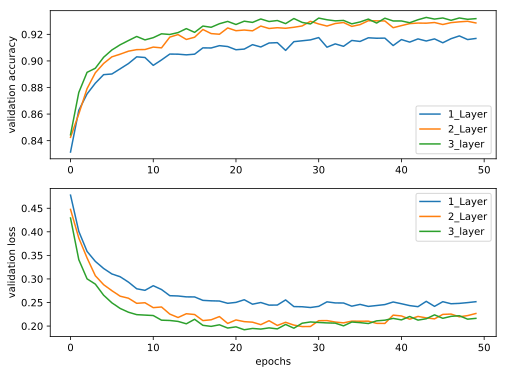

In [13]:
# plot the accuracy and loss

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for history in history_dict:
    val_acc = history_dict[history].history['val_acc']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()